# Execute the Machine Learning Models

### Data Preprocessing

In [11]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from tabulate import tabulate
from colorama import Fore, Style
import gradio as gr


In [12]:
df = pd.read_csv('D:/Program Files/ML case Study.csv',header =0)

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df = pd.read_csv('D:/Program Files/colleges.csv', header = 0)

In [5]:
df.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [6]:
df = pd.read_csv('D:/Program Files/cities.csv', header = 0)

In [7]:
df.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


### EDD Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [16]:
df.shape

(1589, 8)

In [18]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [20]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


## Outliers Determination and Treatment

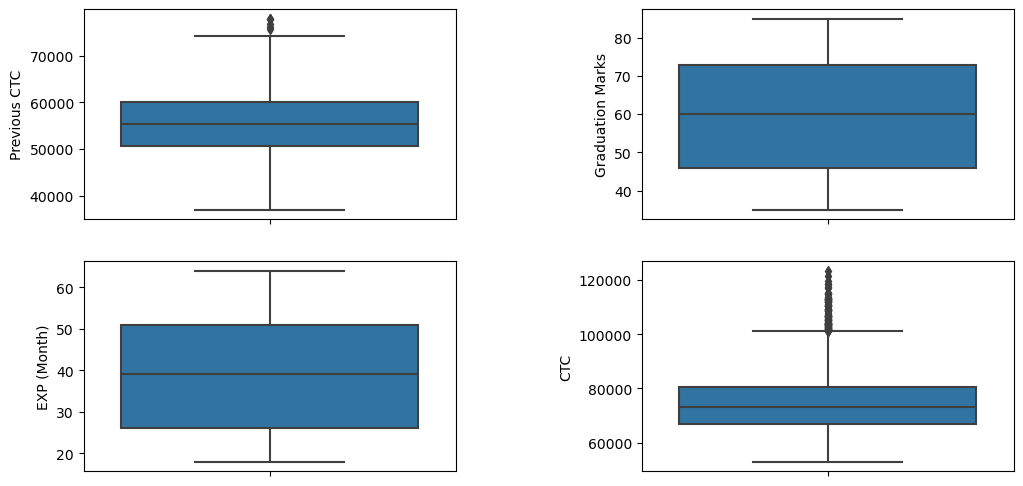

In [22]:
numerical_columns = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)

plt.show()

<Axes: xlabel='Previous CTC', ylabel='CTC'>

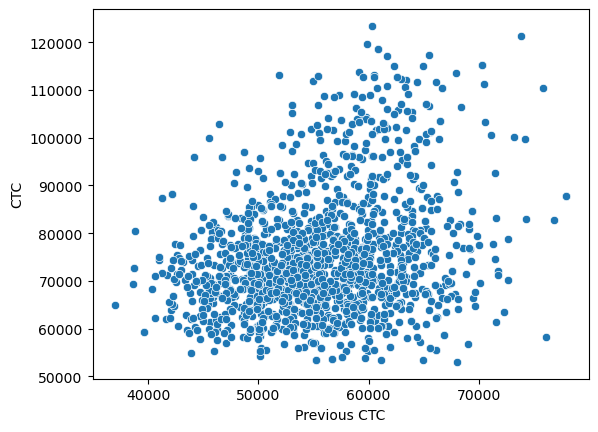

In [24]:
sns.scatterplot(x = df['Previous CTC'], y = df['CTC'])

<Axes: xlabel='Previous job change', ylabel='CTC'>

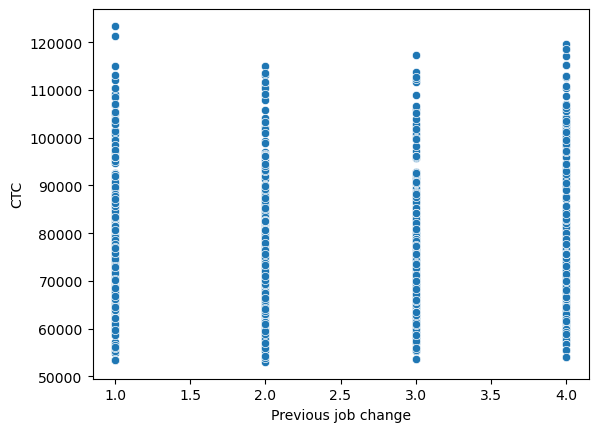

In [26]:
sns.scatterplot(x = 'Previous job change', y = 'CTC', data = df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


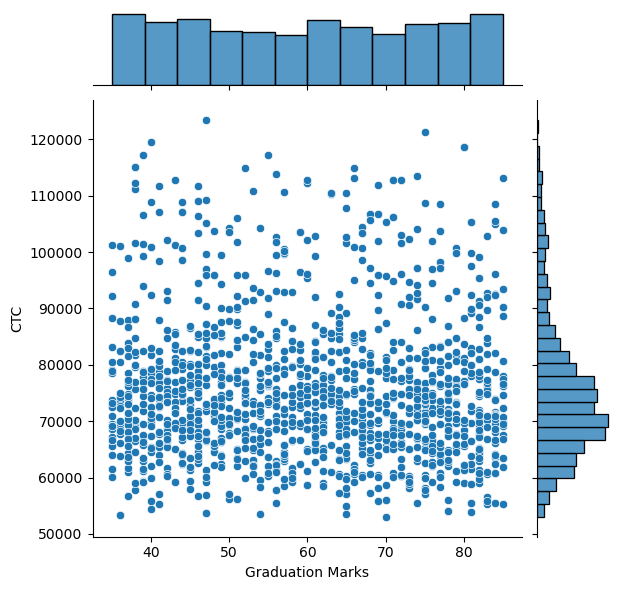

In [28]:
sns.jointplot(x = df['Graduation Marks'], y= df['CTC'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CTC', ylabel='Count'>

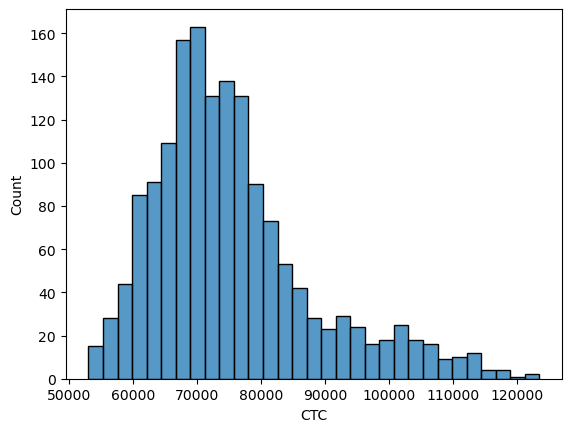

In [30]:
sns.histplot(df['CTC'])

## Calculate the 99th percentile value of the 'Previous CTC' column in the 'df' DataFrame

In [32]:
upper_limit = np.percentile(df['Previous CTC'], [99])[0]

In [34]:
upper_limit

71506.92

In [36]:
df[(df['Previous CTC'] > upper_limit)]

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
116,"MSIT, Delhi",Delhi,Executive,77911.0,1,50,58,87831.62
292,"USIT, Delhi",Kozhikode,Manager,74198.0,1,57,25,99644.51
543,NSUT Delhi (NSIT),Kolkata,Manager,73856.0,1,75,54,121362.73
572,IIT ISM Dhanbad,Surat,Executive,71543.0,4,82,30,61366.78
701,DAIICT,Kozhikode,Executive,71549.0,4,47,50,83116.21
847,NIT Warangal,Kolkata,Executive,71756.0,4,67,23,72141.43
860,BITS Pilani (Goa Campus),Delhi,Manager,75785.0,4,63,37,110338.25
941,Manipal Main Campus,Chennai,Executive,72319.0,1,51,50,63538.43
1024,IIT Kharagpur,Bangalore,Executive,72661.0,3,74,47,70238.70
1047,IIT BHU (Varanasi),Kolhapur,Manager,73214.0,4,57,22,100119.53


In [38]:
df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit

C:\Users\Admin\AppData\Local\Temp\ipykernel_9460\1147035119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit


In [40]:
upper_limit2 = np.percentile(df['CTC'], [99])[0]

In [42]:
upper_limit2

112826.26

In [44]:
df[(df['CTC'] > upper_limit2)]

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
34,IIIT Hyderabad,Durgapur,Manager,60894.0,4,80,28,118651.89
185,IIIT Lucknow,Durgapur,Manager,70258.0,4,38,36,115126.75
254,NIT Kurukshetra,Bangalore,Manager,51912.0,2,66,50,113141.14
328,"KIIT, Bhubaneswar",Kolhapur,Manager,62264.0,2,52,64,114996.23
543,NSUT Delhi (NSIT),Kolkata,Manager,73856.0,1,75,54,121362.73
577,TIET/Thapar University,Chennai,Manager,59101.0,3,56,31,113843.16
668,IIT Delhi,Delhi,Manager,60476.0,1,85,62,113212.07
883,Amity University,Chennai,Manager,64930.0,1,66,51,114939.65
1146,BITS Pilani (Goa Campus),Kolkata,Manager,61709.0,4,39,60,117207.24
1230,IIIT Lucknow,Asansol,Manager,60298.0,1,47,52,123416.99


In [46]:
df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2

C:\Users\Admin\AppData\Local\Temp\ipykernel_9460\2453018167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2


##### Note : There is no outliers in this data which can affect the data

## Correlation Matrix

In [49]:
df.corr()

ValueError: could not convert string to float: 'SVNIT Surat'

## Train-Test Split

In [51]:
x_multi = df.loc[:, df.columns != 'CTC']
y_multi = df['CTC']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state = 0)

In [55]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [57]:
x_train

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month)
1062,DTU,Asansol,Manager,61410.0,4,83,59
215,IIT Delhi,Ahmedabad,Executive,59781.0,1,46,41
654,IIIT Allahabad,Rajpur Sonarpur,Executive,62521.0,1,70,59
55,IIIT Hyderabad,Kozhikode,Manager,66624.0,1,63,58
1187,"Cummins College of Engineering for Women, Pune",Durgapur,Executive,54621.0,2,52,62
...,...,...,...,...,...,...,...
763,LNMIIT,Rajpur Sonarpur,Executive,54660.0,3,43,27
835,BITS Pilani (Goa Campus),Bangalore,Executive,58049.0,2,51,42
1216,SRM Main Campus,Pune,Executive,52744.0,4,80,40
559,IIT Delhi,Asansol,Executive,56519.0,1,64,19


## Liniear Regression

In [59]:
x = sn.add_constant(df['EXP (Month)'])

In [61]:
lm = sn.OLS(df['CTC'], x).fit()

In [63]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     158.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.16e-34
Time:                        23:03:45   Log-Likelihood:                -17180.
No. Observations:                1589   AIC:                         3.436e+04
Df Residuals:                    1587   BIC:                         3.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.486e+04    886.559     73.164      0.000    6.31e+04    6.66e+04
EXP (Month)   268.6413     21.356     12.579      0.000     226.753     310.530
==============================================================================
Omnibus:                      313.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.318
Skew:                           1.256   Prob(JB):                    4.69e-118
Kurtosis:                       4.361   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


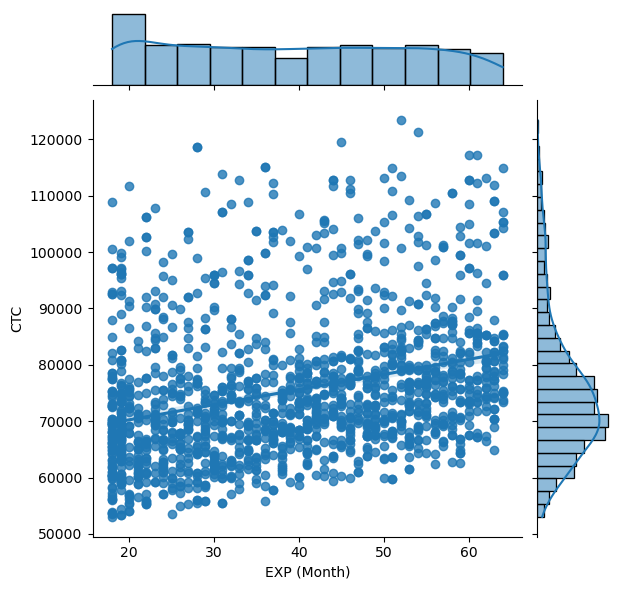

In [65]:
sns.jointplot(x=df['EXP (Month)'], y = df['CTC'], data = df, kind = 'reg')

In [102]:
#Multiple linear Regression

lm_multi = LinearRegression('DTU')

lm_multi.fit(x_train, y_train)

y_train_lm_multi = lm_multi.predict(x_train)
y_test_lm_multi = lm_multi.predict(x_test)

r2_lm_multi_train = r2_score(y_train, y_train_lm_multi)
r2_lm_multi_test = r2_score(y_test, y_test_lm_multi)

mse_lm_multi_train = mean_squared_error(y_train, y_train_lm_multi)
mse_lm_multi_test = mean_squared_error(y_test, y_test_lm_multi)

print("Linear Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_multi_train:.4f}, Test: {r2_lm_multi_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_multi_train:.4f}, Test: {mse_lm_multi_test:.4f}\n")

TypeError: LinearRegression.__init__() takes 1 positional argument but 2 were given

In [82]:
x_const = sn.add_constant(x_multi)

In [ ]:
lm = sn.OLS(y_multi, x_const).fit()

In [97]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     158.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.16e-34
Time:                        23:07:58   Log-Likelihood:                -17180.
No. Observations:                1589   AIC:                         3.436e+04
Df Residuals:                    1587   BIC:                         3.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.486e+04    886.559     73.164      0.000    6.31e+04    6.66e+04
EXP (Month)   268.6413     21.356     12.579      0.000     226.753     310.530
==============================================================================
Omnibus:                      313.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.318
Skew:                           1.256   Prob(JB):                    4.69e-118
Kurtosis:                       4.361   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
import sys

In [126]:
lm_multi = LinearRegression()

In [182]:
# Predicting values for the training and test datasets using a Ridge regression model with the best hyperparameters.
y_train_lm_r_best = lm_r_best.predict(x_train_s)
y_test_lm_r_best = lm_r_best.predict(x_test_s)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_r_best_train = r2_score(y_train, y_train_lm_r_best)
r2_lm_r_best_test = r2_score(y_test, y_test_lm_r_best)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_r_best_train = mean_squared_error(y_train, y_train_lm_r_best)
mse_lm_r_best_test = mean_squared_error(y_test, y_test_lm_r_best)

AttributeError: 'NoneType' object has no attribute 'predict'

In [105]:
x_const = sn.add_constant(x_multi)

In [184]:
lm = sn.OLS(y_multi, x_const).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [109]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     158.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.16e-34
Time:                        23:14:25   Log-Likelihood:                -17180.
No. Observations:                1589   AIC:                         3.436e+04
Df Residuals:                    1587   BIC:                         3.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.486e+04    886.559     73.164      0.000    6.31e+04    6.66e+04
EXP (Month)   268.6413     21.356     12.579      0.000     226.753     310.530
==============================================================================
Omnibus:                      313.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.318
Skew:                           1.256   Prob(JB):                    4.69e-118
Kurtosis:                       4.361   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

ValueError: could not convert string to float: 'SVNIT Surat'

In [146]:
y_train_lm_r_best = lm_r_best.predict(x_train_s)
y_test_lm_r_best = lm_r_best.predict(x_test_s)

r2_lm_r_best_train = r2_score(y_train, y_train_lm_r_best)
r2_lm_r_best_test = r2_score(y_test, y_test_lm_r_best)

mse_lm_r_best_train = mean_squared_error(y_train, y_train_lm_r_best)
mse_lm_r_best_test = mean_squared_error(y_test, y_test_lm_r_best)

AttributeError: 'NoneType' object has no attribute 'predict'

# Create a DecisionTreeRegressor with a maximum depth of 3 and fit it to the training data

In [190]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train, y_train)

ValueError: could not convert string to float: 'SVNIT Surat'

In [153]:
# Predicting values for the training and test datasets using a regression tree model.
y_train_regtree = regtree.predict(x_train)
y_test_regtree = regtree.predict(x_test)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_regtree_train = r2_score(y_train, y_train_regtree)
r2_regtree_test = r2_score(y_test, y_test_regtree)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_regtree_train = mean_squared_error(y_train, y_train_regtree)
mse_regtree_test = mean_squared_error(y_test, y_test_regtree)


ValueError: could not convert string to float: 'DTU'

In [156]:
# Print the results
print("Decision Tree Regression:")
print(f"R-squared (R^2) - Train: {r2_regtree_train:.4f}, Test: {r2_regtree_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_regtree_train:.4f}, Test: {mse_regtree_test:.4f}\n")

Decision Tree Regression:


NameError: name 'r2_regtree_train' is not defined

In [159]:
# Export the decision tree as a graphical visualization
dot_data = tree.export_graphviz(regtree, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree as an image
Image(graph.create_png())

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

In [162]:
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2,4, 5,6, 10],
    'min_samples_leaf': [1, 2, 4,6,8] 
}

# Create a DecisionTreeRegressor
regtree_gs = tree.DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(regtree_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator (DecisionTreeRegressor) with the best hyperparameters
best_regtree = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_regtree.predict(x_train)
y_test_pred = best_regtree.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_dt = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_dt = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_dt = mean_squared_error(y_train, y_train_pred)

# Calculate the Mean Squared Error for testing data
mse_test_dt = mean_squared_error(y_test, y_test_pred)

# Print the results
print("R-squared (R2) for Training Data:", r2_train_dt)
print("R-squared (R2) for Testing Data:", r2_test_dt)
print("Mean Squared Error (MSE) for Training Data:", mse_train_dt)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_dt)

ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'IIT Guwahati'

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'DTU'


In [173]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import gradio as gr

In [175]:
# One-hot encode the 'City', 'Role', and 'College' columns
df_encoded = pd.get_dummies(df, columns=['City', 'Role'], drop_first=True)

# Define features and target variables
x_train = df_encoded.drop(columns=['Previous CTC'])
y_train = df_encoded['Previous CTC']

# Define the RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=5, min_samples_leaf=2)

# Fit the model on the entire dataset
best_rf.fit(x_train, y_train)

def predict_salary_interface(previous_ctc, prev_job_change, graduation_marks, exp_month, college, role):
    try:
        previous_ctc = float(previous_ctc)
        prev_job_change = float(prev_job_change)
        graduation_marks = float(graduation_marks)
        exp_month = float(exp_month)

        # Find the corresponding one-hot encoding for the college
        college_encoded = pd.get_dummies(pd.DataFrame({'College': [college]}), columns=['College'], drop_first=True)

        # Create input data with all features
        input_data = pd.DataFrame({
            'Previous job change': [prev_job_change],
            'Graduation Marks': [graduation_marks],
            'EXP (Month)': [exp_month]
        })

        # Add one-hot encoded college and role
        input_data = pd.concat([input_data, college_encoded], axis=1)
        input_data['Role_Executive'] = 1 if role == 'Executive' else 0
        input_data['Role_Manager'] = 1 if role == 'Manager' else 0

        # Make a prediction using the trained model
        predicted_salary = best_rf.predict(input_data)[0]

        # Calculate R-squared and MSE for the prediction
        y_pred_all = best_rf.predict(x_train)
        r2 = r2_score(y_train, y_pred_all)
        mse = mean_squared_error(y_train, y_pred_all)

        return f"{predicted_salary:.0f}", f"{r2*100:.2f}%"

    except ValueError:
        return "Error", "Error in prediction", "Error in prediction"

# Define Gradio inputs
inputs = [
    gr.Number(label="Previous Job Change"),
    gr.Number(label="Graduation Marks"),
    gr.Number(label="Experience in Months"),
    gr.Textbox(label="College"),
    gr.Dropdown(choices=["Executive", "Manager"], label="Role"),
]

# Create Gradio interface
iface = gr.Interface(
    fn=predict_salary_interface,
    inputs=inputs,
    outputs=[
        gr.Textbox(label="Predicted CTC"),
        gr.Textbox(label="Accuracy")
    ],
    title="Salary Prediction",
    description="Predict the salary and view overall model evaluation metrics.",
)

# Launch the interface
iface.launch(share=True)

ValueError: could not convert string to float: 'SVNIT Surat'

In [176]:
x_train

,College,Previous job change,Graduation Marks,EXP (Month),CTC,City_Ajmer,City_Asansol,City_Bangalore,City_Chennai,City_Delhi,City_Durgapur,City_Hyderabad,City_Kolhapur,City_Kolkata,City_Kozhikode,City_Pune,City_Rajpur Sonarpur,City_Rourkela,City_Surat,Role_Manager
0,SVNIT Surat,3,66,19,71406.58,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,NIT Bhopal,1,84,18,68005.87,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,"IEM, Kolkata",2,52,28,76764.02,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,"KIIT, Bhubaneswar",2,81,33,82092.39,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,DTU,4,74,32,73878.10,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),3,44,60,77283.59,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1585,NIT Warangal,1,44,24,68416.86,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1586,NIT Tiruchipally (Trichy),1,60,19,70186.19,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1587,IIIT Hyderabad,2,67,29,73394.09,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [194]:
# Function to colorize values based on a threshold
def colorize(value, threshold=0.6):
    if value < threshold:
        return f"{Fore.RED}{value:.4f}{Style.RESET_ALL}"
    return f"{Fore.GREEN}{value:.4f}{Style.RESET_ALL}"

# Define your headings
headings = ["Model", "R-squared (Train)", "R-squared (Test)", "MSE (Train)", "MSE (Test)"]

# Data for the table
data = [
    ["Linear Regression", colorize(r2_lm_multi_train), colorize(r2_lm_multi_test), colorize(mse_lm_multi_train), colorize(mse_lm_multi_test)],
    ["Ridge Regression", colorize(r2_lm_r_best_train), colorize(r2_lm_r_best_test), colorize(mse_lm_r_best_train), colorize(mse_lm_r_best_test)],
    ["Lasso Regression", colorize(r2_lm_l_best_train), colorize(r2_lm_l_best_test), colorize(mse_lm_l_best_train), colorize(mse_lm_l_best_test)],
    ["Decision Tree Regression", colorize(r2_regtree_train), colorize(r2_regtree_test), colorize(mse_regtree_train), colorize(mse_regtree_test)],
    ["Decision Tree with GridSearchCV", colorize(r2_train_dt), colorize(r2_test_dt), colorize(mse_train_dt), colorize(mse_test_dt)],
    ["Random Forest Regressor", colorize(r2_train_rf), colorize(r2_test_rf), colorize(mse_train_rf), colorize(mse_test_rf)],
    ["XG Boost Regressor", colorize(r2_train_xgb), colorize(r2_test_xgb), colorize(mse_train_xgb), colorize(mse_test_xgb)],
    ["Bagging Regressor", colorize(r2_train_bagging_reg), colorize(r2_test_bagging_reg), colorize(mse_train_bagging_reg), colorize(mse_test_bagging_reg)],
]

# Print the table
table = tabulate(data, headers=headings, tablefmt="fancy_grid")
print(table)

NameError: name 'r2_lm_multi_train' is not defined

# Answering the questions

### 1. Your views about the problem statement?
The problem statement is about company named TechWorks Consulting wants to create a machine learning model to determine the salary of newly hired employees. It is important to companies to set competitive and fair salary to employees. Machine Learning model can provide objective on this problem based on many variables like college, Experience, Role, previous CTC and academic record. As a data scientist my role is to make a effective machine learning model or predictive model and evaluate its performance..

### 2. What will be your approach to solving this task?

My approach to solving this task is as follows:l
(A) Data Preprocessing:
- Convert "College" into a numerical data type based on the tier of the college.
- Create dummy variables for the "Tier" and "Role" fields.
- Perform Exploratory Data Analysis (EDA) and check for null values.
- Visualize various graphs to find outliers.
- Identify outliers using percentiles (e.g., 99th and 1st percentiles) and consider them as potential outliers.
- Treat outliers by replacing them with the mean if outliers are present.

### 3. What were the available ML model options you had to perform this task?**
For predicting employee salaries, we considered various regression models.
For predicting employee salaries, we considered a range of regression models.
1.  Simple Linear Regression:
    Suitable when there's a straightforward, linear relationship between one feature and salary.
2.  Multiple Linear Regression:
    Useful when multiple features influence salary, allowing for more complex relationships to be considered.

### 4. Which model’s performance is best and what could be the possible reason for that?
I evaluated several regression models to predict the target variable
Decision Tree Regression:
Decision Tree Regression with GridSearchCV 

### 5. What steps can you take to improve this selected model’s performance even further?
To further enhance the performance of the selected model, I took the following steps:
1.Validation Curve for Ridge and Lasso Regression
GridSearchCV for Tree Regression